# Hamming Code Lab

### Author: Dakota, Michael, Yuliya, Shawn
### Date: April 24, 2023

Project Description: In this lab, we will use the techniques described in 3Blue1Brown's Hamming Codes video to implement Hamming codes and thoroughly tests the functionality of the code you've written.

---

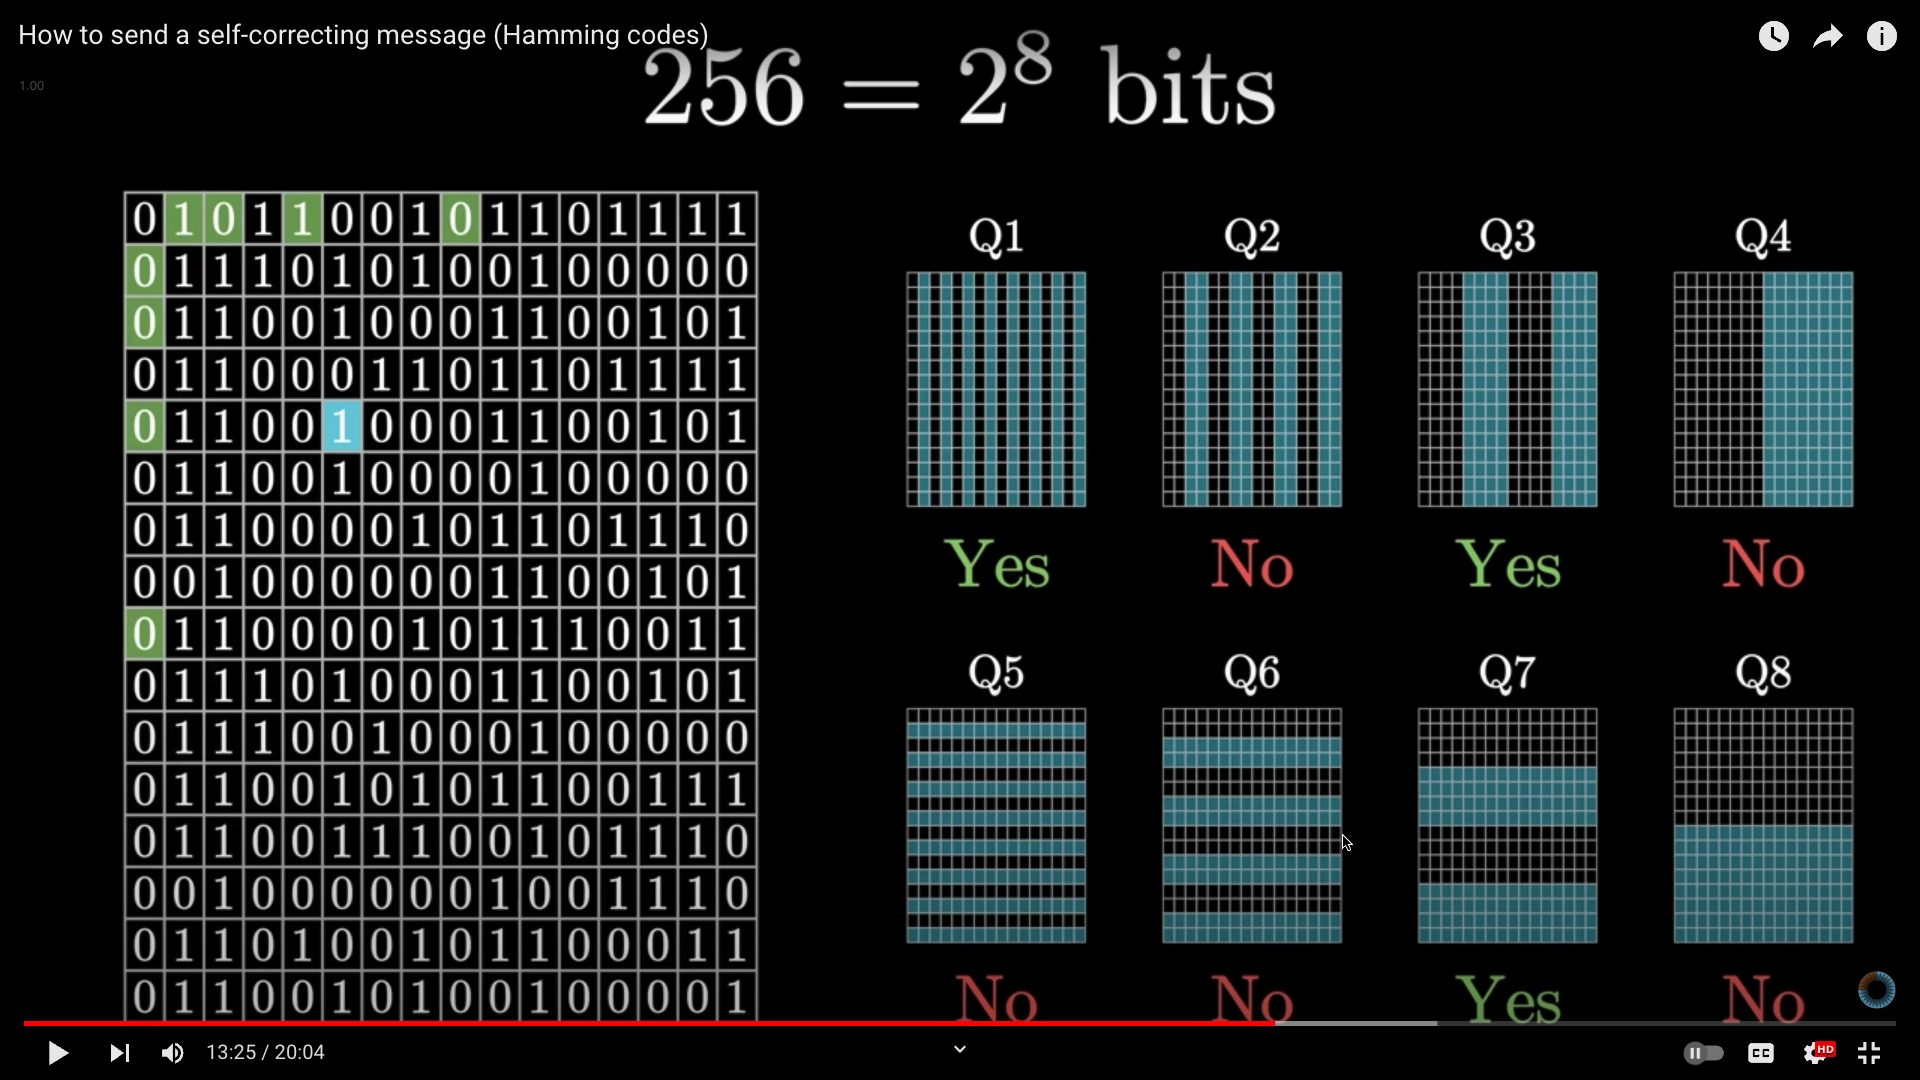

Implementation

In [1]:
# Hamming code

# first off, we want the input to be a 16 by 16 matrix

def create_matrix(x):
    ret = []
    temp = []
    if len(x) != 246:
        return
#     we want 16 arrays
    for i in range(16):
        for j in range(16):
            if i == 0:
                if j == 0 or j == 1 or j == 2 or j == 4 or j == 8:
                    temp.append(0)
                else:
                    temp.append(int(x[i+j]))
            elif j == 0:
                if i == 1 or i == 2 or i == 4 or i == 8:
                    temp.append(0)  
                else: 
                    temp.append(int(x[i+j]))
            else:
                temp.append(int(x[i+j]))
        ret.append(temp)
        temp = []
    return ret

In [2]:
# even is 0, odd is 1
# All positions to be populated listed below:
# arr 0, pos 1,2,4,8
# arr 1, 2, 4, 8 pos 0
# i is row, j is column

# [first position (columns) / fifth position (rows)] (arr0 pos1, arr1 pos 0)
# 1, 3, 5, 7, 9, 11, 13, 15
# [second position (columns) / sixth position (rows)] (arr0 pos2, arr2 pos0)
# 2, 3, 6, 7, 10, 11, 14, 15
# [third position (columns) / seventh position (rows)] (arr0 pos4, arr4 pos0)
# 4, 5, 6, 7, 12, 13, 14, 15
# [fourth position (columns) / eighth position(rows)] (arr0 pos8, arr8 pos0)
# 8, 9, 10, 11, 12, 13, 14, 15

def even_odd_columns(matrix, columns):
    columns_to_check = columns
    num_zero = 0
    for i in range(16):
        for j in range(16):
            if j in columns_to_check:
                if matrix[i][j] == 0:
                    num_zero += 1
    return num_zero%2

def even_odd_rows(matrix, rows):
    rows_to_check = rows
    num_zero = 0
    for i in range(16):
        for j in range(16):
            if i in rows_to_check:
                if matrix[i][j] == 0:
                    num_zero += 1
    return num_zero%2

def last_check(matrix):
    num_zero = 0
    for i in range(16):
        for j in range(16):
            if matrix[i][j] == 0:
                num_zero += 1
    return num_zero%2
              
# populates matrix based on functions above
def populate_matrix(matrix):
    ret = matrix
    check_1 = [1, 3, 5, 7, 9, 11, 13, 15]
    check_2 = [2, 3, 6, 7, 10, 11, 14, 15]
    check_3 = [4, 5, 6, 7, 12, 13, 14, 15]
    check_4 = [8, 9, 10, 11, 12, 13, 14, 15]
    ret[0][1] = even_odd_columns(ret, check_1)
    ret[0][2] = even_odd_columns(ret, check_2)
    ret[0][4] = even_odd_columns(ret, check_3)
    ret[0][8] = even_odd_columns(ret, check_4)
    ret[1][0] = even_odd_rows(ret, check_1)
    ret[2][0] = even_odd_rows(ret, check_2)
    ret[4][0] = even_odd_rows(ret, check_3)
    ret[8][0] = even_odd_rows(ret, check_4)
    ret[0][0] = last_check(ret)
    return ret

def print_matrix(matrix):
    for i in range(16):
        print(matrix[i])
        
def hamming_code(x):
    matrix = create_matrix(x)
    return populate_matrix(matrix)

---

Testing

In [3]:
import random

In [4]:
for i in range(int(246/3)):
    print("101", end='')

101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101

In [5]:
testing_matrix = hamming_code("101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101101")
print_matrix(testing_matrix)

[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]


In [6]:
import copy

def generate_incorrect_matrix(matrix):
    matrix_incorrect = copy.deepcopy(matrix) # create a copy of the matrix
    row = random.randint(0,15)
    column = random.randint(0,15)
    swap = lambda x: 0 if x == 1 else 1
    matrix_incorrect[row][column] = swap(matrix[row][column])
    print("correct matrix: ")
    print_matrix(matrix)
    print("incorrect matrix, swapped row " + str(row) + " and column " + str(column) + " from " + str(matrix[row][column]) + " to " + str(matrix_incorrect[row][column]) + ": ")
    print_matrix(matrix_incorrect)
    return matrix_incorrect


In [7]:
matrix_incorrect = generate_incorrect_matrix(testing_matrix)

correct matrix: 
[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
incorrect matrix, swapped row 15 and column 0 from 1 to 0: 
[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1

In [8]:
def even_odds(testing_matrix):
    total_zero = 0
    for i in range(16):
        for j in range(16):
            if testing_matrix[i][j] == 0:
                total_zero += 1
    print("zero: " + str(total_zero))

    total_one = 0
    for i in range(16):
        for j in range(16):
            if testing_matrix[i][j] == 1:
                total_one += 1
    print("one: " + str(total_one))
    
    if total_zero % 2 == 0:
        return True
    else:
        return False

In [9]:
print("testing_matrix: ")
even_odds(testing_matrix)
print()
print("matrix_incorrect: ")
even_odds(matrix_incorrect)

testing_matrix: 
zero: 82
one: 174

matrix_incorrect: 
zero: 83
one: 173


False

In [10]:
def are_matrices_equal(matrix1, matrix2):    
    for i in range(16):
        for j in range(16):
            if matrix1[i][j] != matrix2[i][j]:
                return False
    return True

def check_matrix(matrix_input):
    check_1 = [1, 3, 5, 7, 9, 11, 13, 15]
    check_2 = [2, 3, 6, 7, 10, 11, 14, 15]
    check_3 = [4, 5, 6, 7, 12, 13, 14, 15]
    check_4 = [8, 9, 10, 11, 12, 13, 14, 15]
    
    matrix = copy.deepcopy(matrix_input)
    checkpoints = [matrix[0][1], matrix[0][2], matrix[0][8], matrix[1][0], matrix[2][0], matrix[4][0], matrix[8][0], matrix[0][0]]
    
#    repopulate matrix based on numbers
    if even_odds(matrix) != True:
        print("even odds")
        return False
    else:
        matrix[0][1] = 2
        matrix[0][2] = 2
        matrix[0][8] = 2
        matrix[1][0] = 2
        matrix[2][0] = 2
        matrix[4][0] = 2
        matrix[8][0] = 2
        matrix[0][0] = 2
        
        if checkpoints[0] != even_odd_columns(matrix, check_1) \
            or checkpoints[1] != even_odd_columns(matrix, check_2) \
            or checkpoints[2] != even_odd_columns(matrix, check_3) \
            or checkpoints[3] != even_odd_columns(matrix, check_4) \
            or checkpoints[4] != even_odd_rows(matrix, check_1) \
            or checkpoints[5] != even_odd_rows(matrix, check_2) \
            or checkpoints[6] != even_odd_rows(matrix, check_3) \
            or checkpoints[7] != even_odd_rows(matrix, check_4) \
            or checkpoints[8] != last_check(matrix):
            print("looped here")
            return False
#         correct = copy.deepcopy(matrix)
#         correct = populate_matrix(correct)
#         if are_matrices_equal(correct, matrix):
#             return True
    return "Unsure"

In [11]:
check_matrix(testing_matrix)

zero: 82
one: 174
looped here


False

In [12]:
correct = copy.deepcopy(testing_matrix)
correct = populate_matrix(correct)
are_matrices_equal(correct, testing_matrix)

False

In [13]:
even_odds(correct)

zero: 90
one: 166


True

In [14]:
even_odds(testing_matrix)

zero: 82
one: 174


True

In [ ]:
import numpy as np

def compute_parity(vec):
    return np.sum(vec) % 2

def check_matrix(matrix):
    matrix = np.array(matrix)
    forbidden_places = [1,2,4,8]
    column_marks = matrix[0, forbidden_places]
    row_marks = matrix[forbidden_places, 0]
    matrix[0, forbidden_places]=0
    matrix[forbidden_places, 0]=0
    column_sums = np.sum(matrix, axis=0)
    row_sums = np.sum(matrix, axis=1)

def bin_search(vec, marks):
    check_1 = [1, 3, 5, 7, 9, 11, 13, 15]
    check_2 = [2, 3, 6, 7, 10, 11, 14, 15]
    check_3 = [4, 5, 6, 7, 12, 13, 14, 15]
    check_4 = [8, 9, 10, 11, 12, 13, 14, 15]
    results = [False]*4
    results[3] = marks[3]==compute_parity(check_4)
    results[2] = marks[2]==compute_parity(check_3)
    results[1] = marks[1]==compute_parity(check_2)
    results[0] = marks[0]==compute_parity(check_1)
    possible = list(range(16))
    